In [3]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read the image
img = cv2.imread('./4.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Convert to grayscale

In [ ]:


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


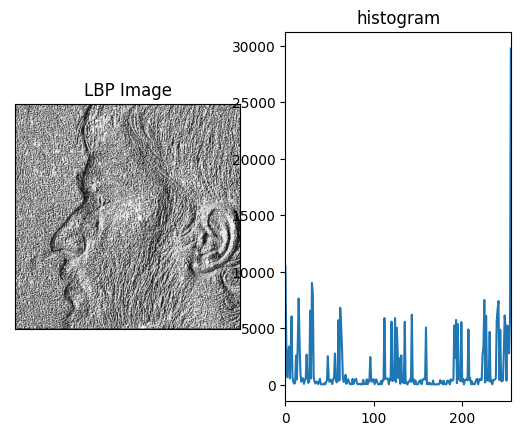

In [ ]:

# Define LBP parameters
radius = 1
n_points = 8 * radius

# Compute LBP image
lbp_img = np.zeros_like(gray_img)
for i in range(radius, gray_img.shape[0] - radius):
    for j in range(radius, gray_img.shape[1] - radius):
        center = gray_img[i, j]
        code = 0
        for n in range(n_points):
            angle = 2 * np.pi * n / n_points
            x = i + int(round(radius * np.cos(angle)))
            y = j - int(round(radius * np.sin(angle)))
            if gray_img[x, y] >= center:
                code |= 1 << n
        lbp_img[i, j] = code


# Display LBP image and histogram
plt.subplot(121), plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
hist1,bin = np.histogram(lbp_img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist1)
plt.title('histogram')

plt.show()

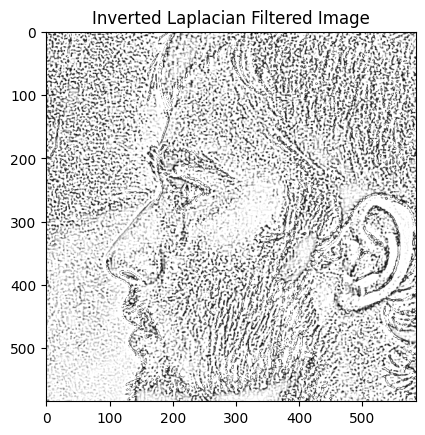

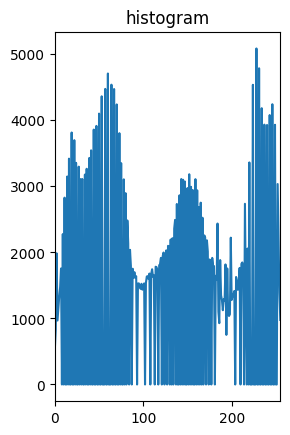

In [ ]:
# geometric feature extraction
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
                            
gray_img = cv2.equalizeHist(gray_img)
# Apply the Laplacian filter
dest = cv2.Laplacian(gray_img, cv2.CV_16S, ksize=5)
# Invert the black and white colors of the filtered image
abs_dest = cv2.convertScaleAbs(255-dest)

# Display the inverted filtered image
plt.imshow(abs_dest, cmap="gray")
plt.title('Inverted Laplacian Filtered Image')
plt.show()

plt.subplot(1,2,2)
hist,bin = np.histogram(gray_img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')

plt.show()




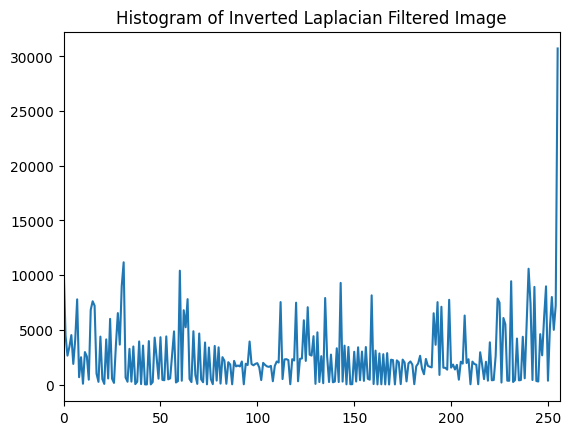

In [ ]:
hist_final = hist+hist1
plt.plot(hist_final)
plt.xlim([0, 256])
plt.title('Histogram of Inverted Laplacian Filtered Image')
plt.show()

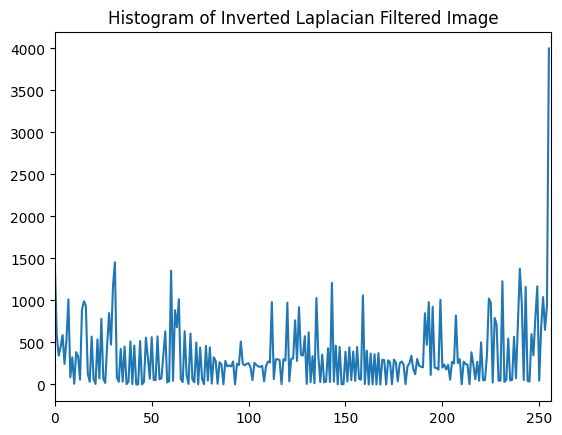

In [ ]:
def normalize_list(input_list):
    min_val = min(input_list)
    max_val = max(input_list)
    output_list = []
    for val in input_list:
        normalized_val = (val - min_val) / (max_val - min_val) * 4000
        output_list.append(normalized_val)
    return output_list
plt.plot(normalize_list(hist_final))
plt.xlim([0, 256])
plt.title('Histogram of Inverted Laplacian Filtered Image')
plt.show()